# USA Car EDA and regression

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from pandas_profiling import ProfileReport


In [6]:
def plot_bar_vertical(df,figsize=(10,15),xlabel='Count Number',color='tab:blue'):
    ax = df.plot.barh(figsize=figsize,color=color)
    plt.xlabel(xlabel)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width(),p.get_y() + p.get_height()/2,f'{int(p.get_width())}')

        
def plot_donut_chart(df,figsize=(10,15),subplots=True,radius=0.7,pctdistance=0.8):
    df.plot.pie(figsize=figsize,subplots=subplots,pctdistance=pctdistance,explode=[0.1 for x in df.index])
    centre_circle = plt.Circle((0,0),radius,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

# Load Dataset

In [7]:
car_us_df = pd.read_csv("USA_cars_datasets.csv",index_col=0)
car_us_df.head()

price      brand    model  year   title_status   mileage   color  \
0   6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1   2899       ford       se  2011  clean vehicle  190552.0  silver   
2   5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3  25000       ford     door  2014  clean vehicle   64146.0    blue   
4  27700  chevrolet     1500  2018  clean vehicle    6654.0     red   

                   vin        lot       state country      condition  
0    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4    3gcpcrec2jg473991  167763266     florida     usa  22 hours left

In [8]:
car_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2498
Data columns (total 12 columns):
price           2499 non-null int64
brand           2499 non-null object
model           2499 non-null object
year            2499 non-null int64
title_status    2499 non-null object
mileage         2499 non-null float64
color           2499 non-null object
vin             2499 non-null object
lot             2499 non-null int64
state           2499 non-null object
country         2499 non-null object
condition       2499 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 253.8+ KB


In [9]:
car_us_df.describe()

price         year       mileage           lot
count   2499.000000  2499.000000  2.499000e+03  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04  1.676914e+08
std    12116.094936     3.442656  5.970552e+04  2.038772e+05
min        0.000000  1973.000000  0.000000e+00  1.593488e+08
25%    10200.000000  2016.000000  2.146650e+04  1.676253e+08
50%    16900.000000  2018.000000  3.536500e+04  1.677451e+08
75%    25555.500000  2019.000000  6.347250e+04  1.677798e+08
max    84900.000000  2020.000000  1.017936e+06  1.678055e+08

---

---

# EDA Phase

## Feature -> `price`

## What's the distribution of the selling price?

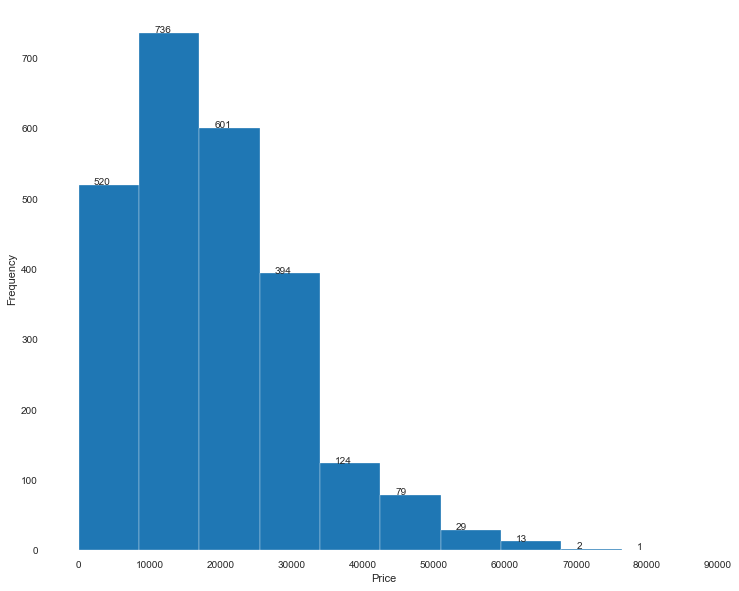

In [32]:
ax = car_us_df.price.plot.hist(figsize=(12,10))

plt.xlabel('Price')

plt.xticks(np.arange(0,100000,10000))
for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/4,p.get_y() + p.get_height(),f'{int(p.get_height())}')


In [34]:
car_us_df.price.describe()

count     2499.000000
mean     18767.671469
std      12116.094936
min          0.000000
25%      10200.000000
50%      16900.000000
75%      25555.500000
max      84900.000000
Name: price, dtype: float64

- Most selling price fell in the range from \$0 to \$30000
- The average price was \$18767
- Let's take a closer look at special cases, cars worth \$0 and greater than \$30000

## Cars with price tag \$0

In [35]:
special_cases_price_zero = car_us_df[(car_us_df.price == 0)]
display(special_cases_price_zero.head(10))
special_cases_price_zero.shape

price      brand   model  year       title_status   mileage   color  \
141      0      dodge     van  2008  salvage insurance  177948.0  orange   
144      0      dodge    door  2014  salvage insurance  123660.0  silver   
196      0       ford     mpv  2017      clean vehicle   76858.0   white   
285      0       ford    door  2000  salvage insurance  124969.0   black   
290      0      mazda    door  2009  salvage insurance  117541.0    gray   
293      0  chevrolet  pickup  1998  salvage insurance  258631.0    gray   
297      0      honda    door  2003  salvage insurance  152608.0   white   
305      0       ford    door  2003  salvage insurance  246065.0    gold   
309      0  chevrolet    door  2004  salvage insurance       0.0  maroon   
310      0  chevrolet    door  2003  salvage insurance  194673.0    gray   

                     vin        lot     state country      condition  
141    2d8hn44h88r669549  167756157      utah     usa    2 days left  
144    1c3cdzab0en111068  167756167      utah     usa    2 days left  
196    1fbax2cv0hkb32599  167656523     texas     usa    2 days left  
285    1fafp34p7yw270338  167251902  oklahoma     usa  17 hours left  
290    jm3er293590215768  167543177   indiana     usa  16 hours left  
293    1gccs1445wk226994  167417659     texas     usa  17 hours left  
297    1hgcm56363a030975  167552893  arkansas     usa  17 hours left  
305    1fafp55u03a242094  167610324    kansas     usa    8 days left  
309    3gnek12t74g240524  167418651   wyoming     usa  18 hours left  
310    1gndt13s632267445  167650636     texas     usa  18 hours left

(43, 12)

- 43 cars had price tags \$0

### What were their brands and models?

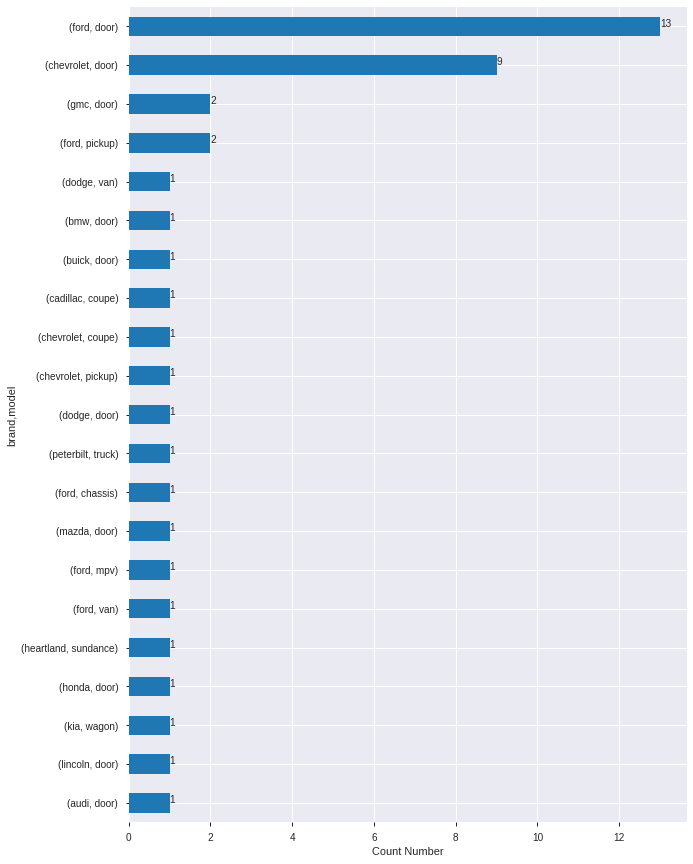

In [10]:
plot_bar_vertical(special_cases_price_zero.groupby(['brand','model']).brand.count().sort_values())

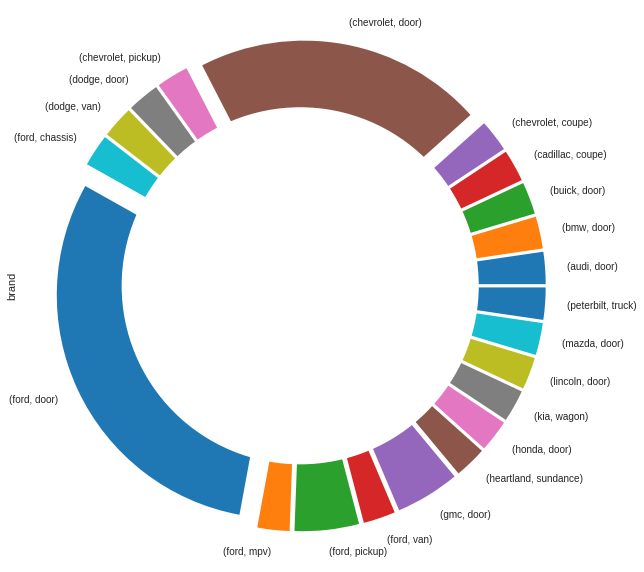

In [11]:
ax = plot_donut_chart(special_cases_price_zero.groupby(['brand','model']).brand.count(),radius=0.8)

- 13 cars from `ford`,`door`, next was 9 cars from `chevrolet`,`door`

### A lot of them had damaged records, which made sense that the prices were extremely low, how about those 'clean' vehicles but yet still for \$0?

In [12]:
special_cases_price_zero[special_cases_price_zero.title_status == 'clean vehicle']

price      brand     model  year   title_status  mileage  color  \
196      0       ford       mpv  2017  clean vehicle  76858.0  white   
349      0  heartland  sundance  2009  clean vehicle      1.0  white   

                     vin        lot         state country    condition  
196    1fbax2cv0hkb32599  167656523         texas     usa  2 days left  
349    5sfgf29269e031344  167266321  pennsylvania     usa  7 days left

- Two cars sold for \$0 while had no damage records.
- first case had a mileage of 76858 mi which was considerably old
- second case was a 2009 white heartland sundance, no mileage on it at all, sitting in a place in pennsylvania covered in dirt for 11 years since it was manufactured, yet it was tagged for \$0

## Cars with tag more than \$ 30000

In [13]:
special_cases_price_great = car_us_df[car_us_df.price >= 30000]
special_cases_price_great.head()

price      brand model  year   title_status  mileage  color  \
12  31900  chevrolet  1500  2018  clean vehicle  22909.0  black   
19  38100       ford  door  2013  clean vehicle  54380.0   gray   
42  30500  chevrolet  1500  2018  clean vehicle  30442.0    red   
44  55000       ford   srw  2017  clean vehicle  15273.0  black   
49  54000       ford   srw  2017  clean vehicle  26241.0  black   

                    vin        lot         state country      condition  
12    3gcukrec0jg176059  167763273     tennessee     usa  22 hours left  
19    1ft8w3dt5deb68569  167753923      virginia     usa  22 hours left  
42    3gcukrec4jg204915  167763393     tennessee     usa  22 hours left  
44    1ft7w3bt5hee88155  167754310  pennsylvania     usa    3 days left  
49    1ft7w3bt0hef02785  167754311  pennsylvania     usa    3 days left

### What car types were the most common among them?

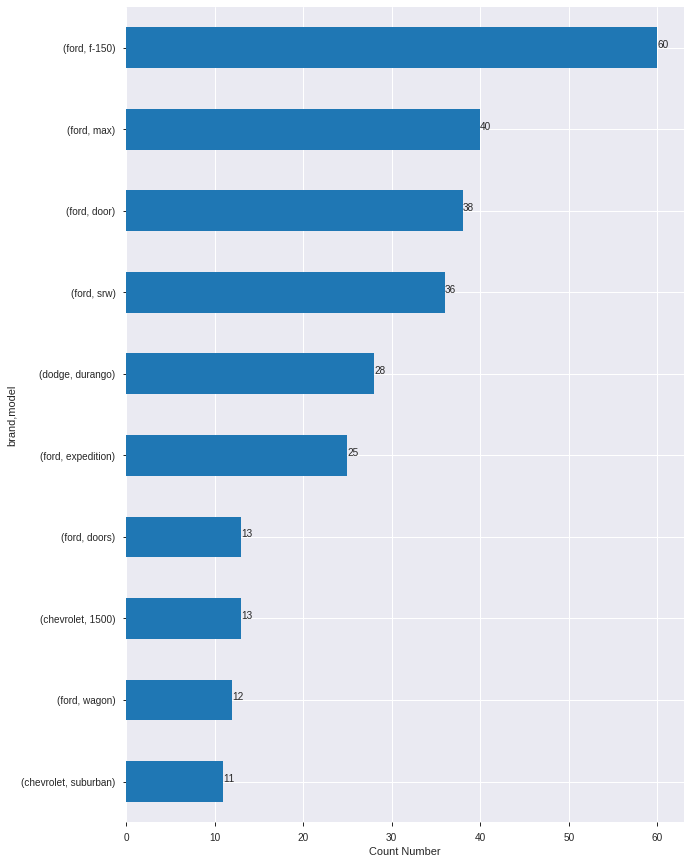

In [14]:
plot_bar_vertical(special_cases_price_great.groupby(['brand','model']).brand.count().sort_values().tail(10))

- `ford`,`f-150` was the most common car type among cars over \$30000

### The most expensive one?

In [15]:
car_us_df[car_us_df.price == car_us_df.price.max()]

price          brand     model  year   title_status  mileage   color  \
502  84900  mercedes-benz  sl-class  2017  clean vehicle  25302.0  silver   

                     vin        lot    state country    condition  
502    wddjk7ea3hf044968  167607883  florida     usa  2 days left

- Most expensive one was the `mercedes-benz`,`sl-class` sold for \$84900 in `florida`

---

## Feature -> `brand`,`model`

## What were most common manufacturer and thier models?

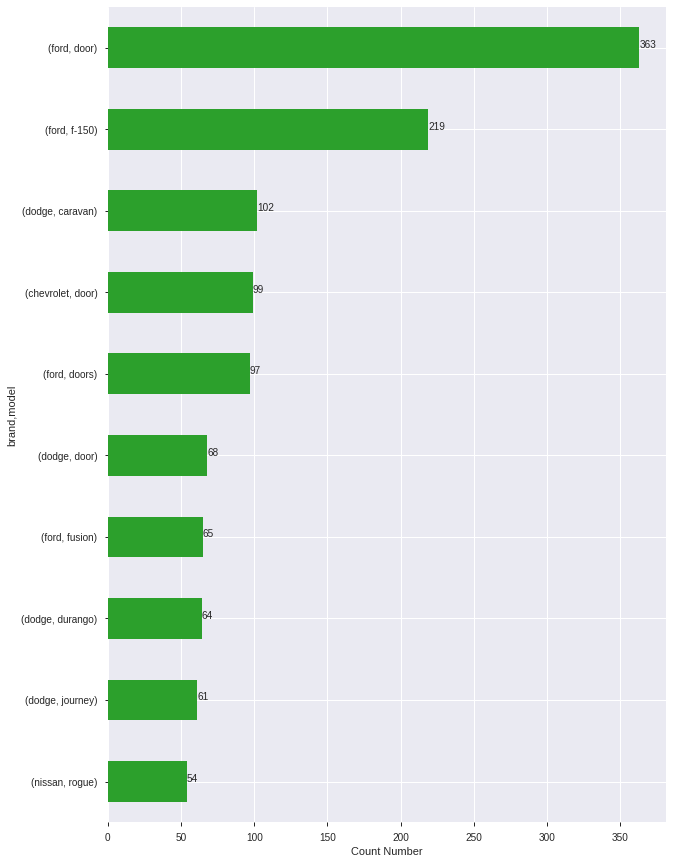

In [16]:
plot_bar_vertical(car_us_df.groupby(['brand','model']).brand.count().sort_values().tail(10),color='tab:green')

- 363 cars from `ford`,`door` 
- Most common manufacturers were `ford`,`dodge`,`nissan`,`chevrolet`
- Most common models were `door`,`f-150`,`caravan`

## What was the average price for each `ford`,`model`?

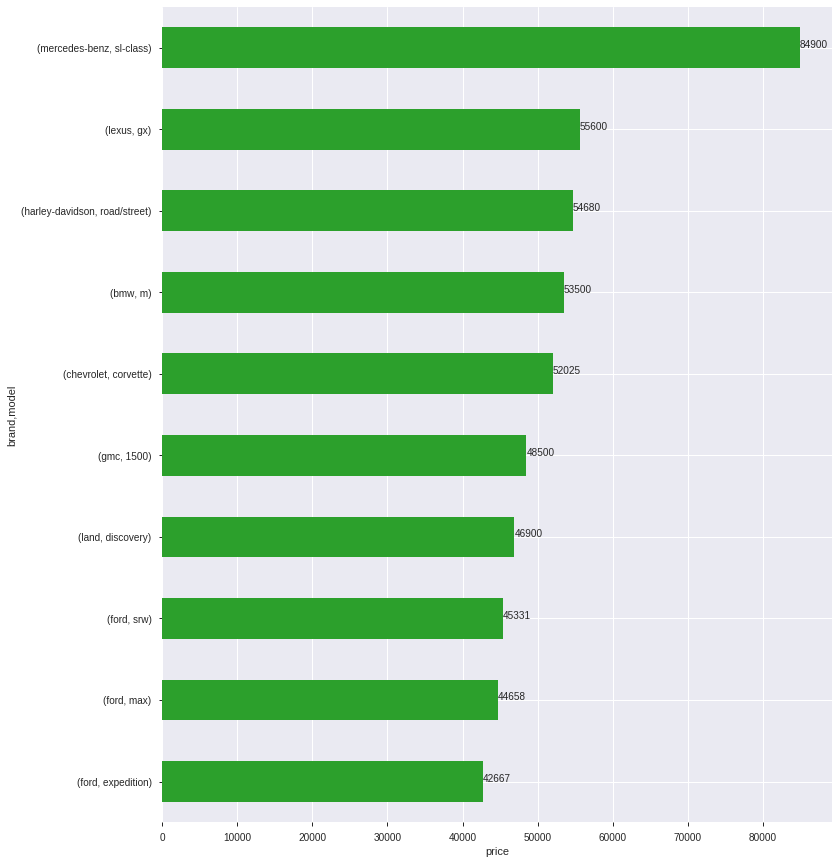

In [17]:
plot_bar_vertical(car_us_df.groupby(['brand','model']).price.mean().sort_values().tail(10),(12,15),'price',color='tab:green')

- `mercedes-benz`,`sl-class` was the most expensive car type with a price of \$84900 , \$29300 more than second place `lexus`,`gx`
- Luxury brands like `mercedes-benz`,`lexus`,`bmw`,`harley-davidson` occupied the top of the chart

---

## Feature -> `title_status`

In [18]:
section_color = 'tab:brown'

### Clean vs Salvage, How many cars were under salvage insurance?

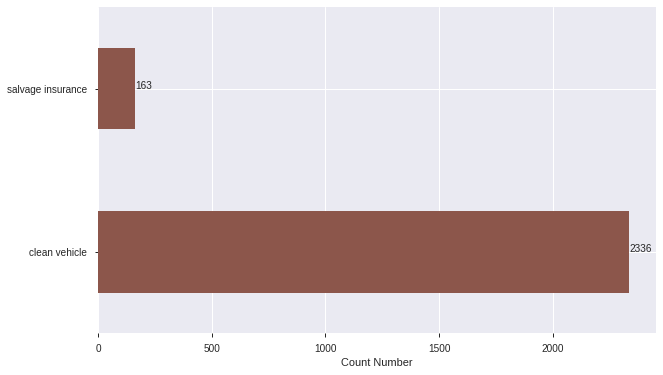

In [19]:
plot_bar_vertical(car_us_df.title_status.value_counts(),(10,6),color=section_color)

In [20]:
print(f'Salvage insuranced rate: {round((car_us_df.title_status.value_counts()[1] / car_us_df.title_status.value_counts()[0]) * 100,2)}%')

Salvage insuranced rate: 6.98%


- Most cars were in clean condition while only 163 were damaged in the past
- Close to 7% of all cars were salvage insuranced

### What was the price for clean vehicles? and for salvage insuranced?

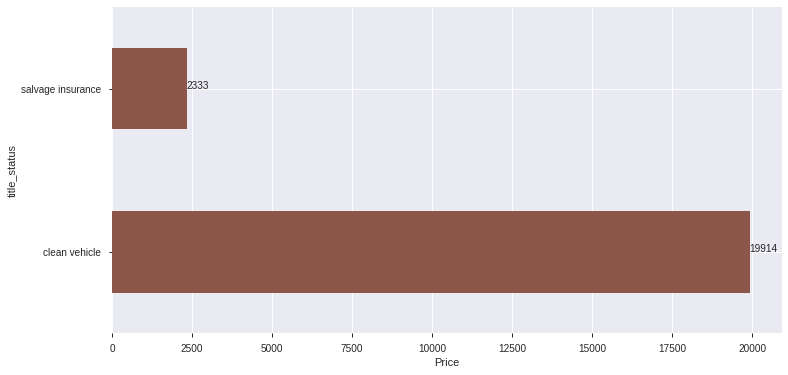

In [21]:
plot_bar_vertical(car_us_df.groupby('title_status').price.mean(),(12,6),'Price',color=section_color)

- In average, salvage insuranced cars were much cheaper than clean with a gap amount of \$17581
- Clean vehicles' average price was close to the mean value we seen in the beginning as expected

In [22]:
car_us_df

price      brand    model  year   title_status   mileage   color  \
0      6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1      2899       ford       se  2011  clean vehicle  190552.0  silver   
2      5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3     25000       ford     door  2014  clean vehicle   64146.0    blue   
4     27700  chevrolet     1500  2018  clean vehicle    6654.0     red   
...     ...        ...      ...   ...            ...       ...     ...   
2494   7800     nissan    versa  2019  clean vehicle   23609.0     red   
2495   9200     nissan    versa  2018  clean vehicle   34553.0  silver   
2496   9200     nissan    versa  2018  clean vehicle   31594.0  silver   
2497   9200     nissan    versa  2018  clean vehicle   32557.0   black   
2498   9200     nissan    versa  2018  clean vehicle   31371.0  silver   

                      vin        lot       state country      condition  
0       jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1       2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2       3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3       1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4       3gcpcrec2jg473991  167763266     florida     usa  22 hours left  
...                   ...        ...         ...     ...            ...  
2494    3n1cn7ap9kl880319  167722715  california     usa    1 days left  
2495    3n1cn7ap5jl884088  167762225     florida     usa  21 hours left  
2496    3n1cn7ap9jl884191  167762226     florida     usa  21 hours left  
2497    3n1cn7ap3jl883263  167762227     florida     usa    2 days left  
2498    3n1cn7ap4jl884311  167762228     florida     usa  21 hours left  

[2499 rows x 12 columns]

---

## Feature -> `mileage`

In [23]:
section_color ='tab:cyan'

### What was the relation between `price` and `mileage`?

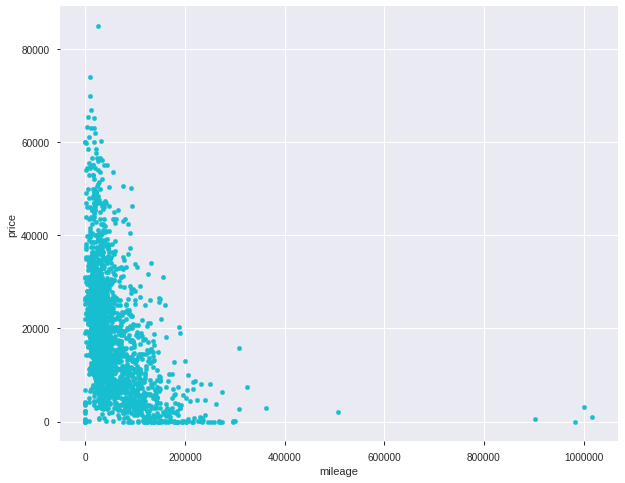

In [24]:
ax = car_us_df.plot(kind='scatter',x='mileage',y='price',figsize=(10,8),color=section_color)

- An exponentially decrase relationship could be obtained
- As `mileage` increased, its `price` dropped exponentially

### What was the maximum mileage? and the car with that number?

In [25]:
print(f'{int(car_us_df.mileage.max())} miles')
car_us_df[car_us_df.mileage == car_us_df.mileage.max()]

1017936 miles


price      brand  model  year       title_status    mileage   color  \
528   1025  peterbilt  truck  2010  salvage insurance  1017936.0  color:   

                     vin        lot    state country      condition  
528    1xp7d49x0ad793710  167529842  georgia     usa  17 hours left

- the maximum mileage was 1,017,936 miles and that was a pretty large one
- It was a `2010`,`peterbilt`,`truck` with unknown color located in georgia which was under salvage insurance for a price of \$1025

## Feature -> `color`

In [26]:
section_color = 'tab:orange'

### What colors were most common?

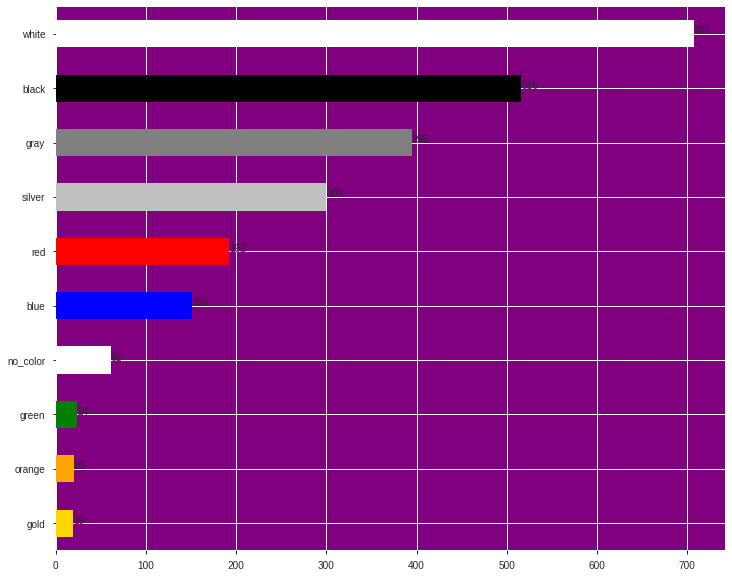

In [27]:
top_colors = [color if color != 'no_color' else '#FFFFFF' for color in car_us_df.color.value_counts().sort_values().tail(10).index]
ax = car_us_df.color.value_counts().sort_values().tail(10).plot.barh(color=top_colors,figsize=(12,10))
ax.set_facecolor('purple')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width(),p.get_y() + p.get_height()/2,f'{int(p.get_width())}')

- `White` color was the most common color
- `no_color` at 7th place was filled with white color but actually it would be transparent instead
- Common colors were `white`,`black`,`gray`,`silver`

## Feature -> `state`

In [28]:
section_color ='tab:purple'

## Which state they were mostly located?

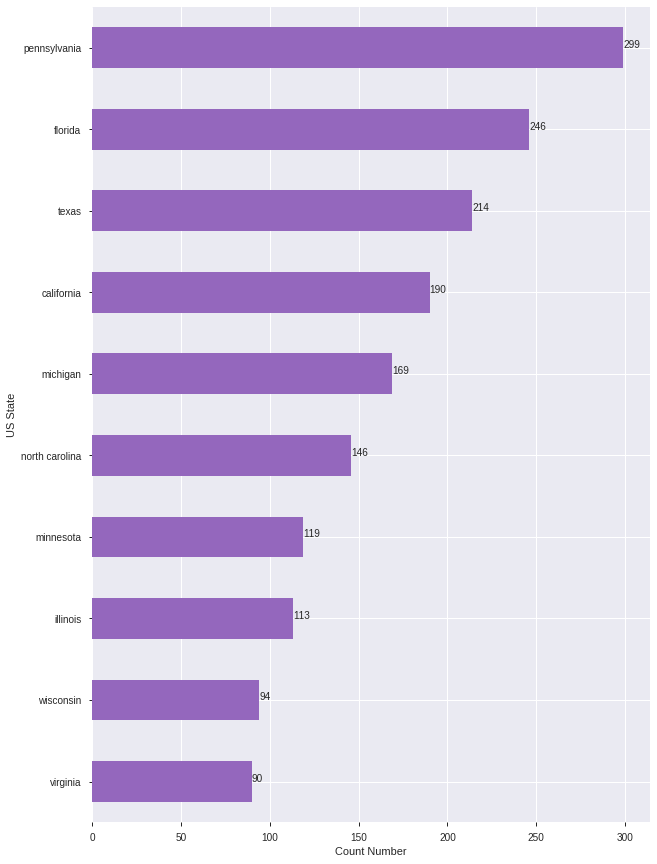

In [29]:
plt.ylabel('US State')
plot_bar_vertical(car_us_df.state.value_counts().sort_values().tail(10),color=section_color)

- 299 cars were located in pennsylvania, following by 246 cars in florida

# Price Estimator

## A price estimator could give a reasonable price for a new coming car according to the market based on given conditions

### Make a copy of original dataframe and dropped features that had no correlation with the target feature `price`

In [30]:
price_estimator_df = car_us_df.copy()
features_to_drop = ['vin','lot','country','condition']
price_estimator_df.drop(features_to_drop,axis=1,inplace=True)
price_estimator_df

price      brand    model  year   title_status   mileage   color  \
0      6300     toyota  cruiser  2008  clean vehicle  274117.0   black   
1      2899       ford       se  2011  clean vehicle  190552.0  silver   
2      5350      dodge      mpv  2018  clean vehicle   39590.0  silver   
3     25000       ford     door  2014  clean vehicle   64146.0    blue   
4     27700  chevrolet     1500  2018  clean vehicle    6654.0     red   
...     ...        ...      ...   ...            ...       ...     ...   
2494   7800     nissan    versa  2019  clean vehicle   23609.0     red   
2495   9200     nissan    versa  2018  clean vehicle   34553.0  silver   
2496   9200     nissan    versa  2018  clean vehicle   31594.0  silver   
2497   9200     nissan    versa  2018  clean vehicle   32557.0   black   
2498   9200     nissan    versa  2018  clean vehicle   31371.0  silver   

           state  
0     new jersey  
1      tennessee  
2        georgia  
3       virginia  
4        florida  
...          ...  
2494  california  
2495     florida  
2496     florida  
2497     florida  
2498     florida  

[2499 rows x 8 columns]

### Found all catgorical features

In [31]:
cat_features = [col for col in price_estimator_df.select_dtypes('object')]
cat_features

['brand', 'model', 'title_status', 'color', 'state']

### Obersrving from dataframe.info(), no missing entries here.

### Separate target feature `price` and other training features

In [32]:
train = price_estimator_df.drop('price',axis=1)
target = price_estimator_df.price

### Import libraries

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict,GridSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

### Cardinality for each categorical feature

In [34]:
[(col,train[col].nunique()) for col in cat_features]

[('brand', 28),
 ('model', 127),
 ('title_status', 2),
 ('color', 49),
 ('state', 44)]

- Cardinality for each categorical feature where basically every feature except title_status had more than 10 unique elements

### I use Label Encoder here instead of One-Hot Encoder due to some features had large cardinality numbers which could generate too many features to the dataset if using One-Hot Encoding

In [35]:
cat_transformer = LabelEncoder()

for col in cat_features:
    train[col] = cat_transformer.fit_transform(train[col])
train

brand  model  year  title_status   mileage  color  state
0        27     25  2008             0  274117.0      2     24
1         8     92  2011             0  190552.0     39     35
2         7     75  2018             0   39590.0     39      7
3         8     32  2014             0   64146.0      4     39
4         5      0  2018             0    6654.0     34      6
...     ...    ...   ...           ...       ...    ...    ...
2494     24    120  2019             0   23609.0     34      3
2495     24    120  2018             0   34553.0     39      6
2496     24    120  2018             0   31594.0     39      6
2497     24    120  2018             0   32557.0      2      6
2498     24    120  2018             0   31371.0     39      6

[2499 rows x 7 columns]

### Split the dataset into training set and validation set

In [36]:
X_train,X_val,y_train,y_val = train_test_split(train,target,test_size=0.2,shuffle=True,random_state=20)

### I chose XGBRegressor since it was a regression task, you could try other regression models like Lasso,ElasticNet etc.

### Baseline Model

In [37]:
model = XGBRegressor()
model.fit(X_train,y_train)
r2_score(y_pred=model.predict(X_val),y_true=y_val)

0.6600797212414371

- With default settings, model had an r2 score of 0.66

### Using grid search to find parameters that had best performance (valuation metric R-squared `r2`)

In [38]:
params_set1 = {'max_depth':[3,4,5],'gamma':[0,1,5]}

model = XGBRegressor()

clf = GridSearchCV(model,params_set1,cv=KFold(n_splits=5),scoring='r2',refit=True)
clf.fit(X_train,y_train)


display(clf.best_score_,clf.best_params_)

0.6645938609609287

{'gamma': 0, 'max_depth': 4}

- Grid search for `max_depth` and `gamma`
- Best one had a r2 score of 0.676
- Optimal parameters shown above

In [39]:
params_set2 = {'n_estimators':[50,100,500,1000],'learning_rate':[0.01,0.03,0.05]}

model = XGBRegressor(max_depth=4,gamma=0)

clf = GridSearchCV(model,params_set2,cv=KFold(n_splits=5),scoring='r2',refit=True)
clf.fit(X_train,y_train)


display(clf.best_score_,clf.best_params_)

0.6742038048585904

{'learning_rate': 0.05, 'n_estimators': 1000}

- Second parameter set on `n_estimators` and `learning_rate`
- Score was improved to 0.68

In [40]:
model = XGBRegressor(gamma=0, max_depth= 4,learning_rate=0.03,n_estimators=1000)
model.fit(X_train,y_train)
r2_score(y_pred=model.predict(X_val),y_true=y_val)

0.6939626173669333

- Finally, I apply those optimal parameters to the model and retrain on the dataset
- r2 score was `0.69`, an increase of 0.03 comparing to the baseline score `0.66`